# Base model 

In [1]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

RSEED = 10

In [2]:
df = pd.read_csv('data/2_data.csv')

# Base model with H1 und H2

<AxesSubplot:xlabel='goal_orig', ylabel='state'>

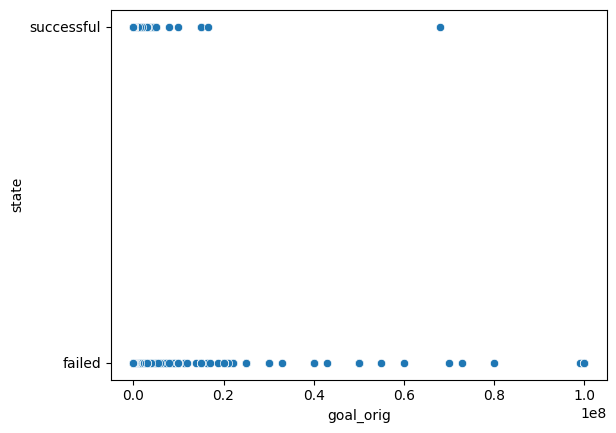

In [3]:
sns.scatterplot(data=df, x='goal_orig',y='state')

In [4]:
# Defining target and predictors 
X = df[['goal_orig','category_id']] #predictors
y = df['state'] #target

In [5]:
# Train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

In [6]:
# Scaling with MinMaxScaler

# Try to scale you data with the MinMaxScaler() from sklearn. 
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 

# Scaling with MinMaxScaler
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [7]:
# Modelling
logistic_regression = LogisticRegression(max_iter=200)
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)

In [8]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6592496153390934


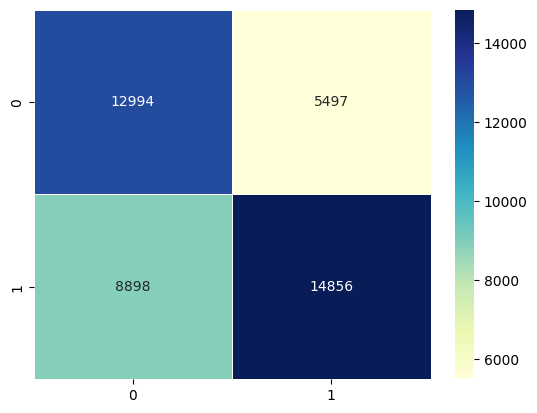

In [9]:
# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

Conclusion: model is shit